<a href="https://colab.research.google.com/github/mathgds/introducao_a_ciencia_de_dados/blob/main/06_logistic_regression_evaluation_metrics_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística e Métricas de Avaliação



## 1. Importando bibliotecas

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


##2. Criando um conjunto de dados sintético

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   1.047409  -0.351228   2.615453   0.362561  -2.300438   0.257857   
1   5.013486   3.106077   3.325190   5.244092  -0.657980  -4.454427   
2   0.743560  -2.611889   4.775630  -3.357577  -0.147939   6.961531   
3  -3.286734  -1.208815   2.872447  -3.863369  -2.859005  -3.715522   
4   1.362524   1.853189   0.964098   2.601057  -0.685089   2.664848   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_11  Feature_12  \
0  -3.161539   0.731948   2.186003   0.968424  ...   -1.291778    1.433592   
1   0.955651   1.072659  -0.161392   2.450752  ...   -1.705102   -0.180382   
2   1.337411   0.627319  -2.039111  -2.124875  ...   -1.888926    0.704001   
3 -14.064554   1.694177   1.216859   2.750818  ...    4.120978   -2.992121   
4  -4.062425   4.416173   0.457207   1.771467  ...    0.738445   -2.795459   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0    0.691618    1.245421  

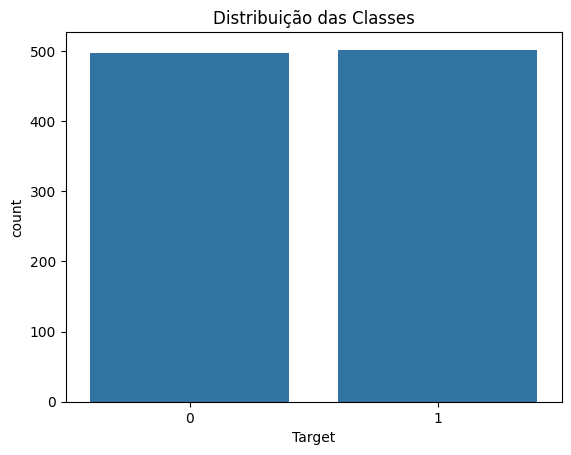

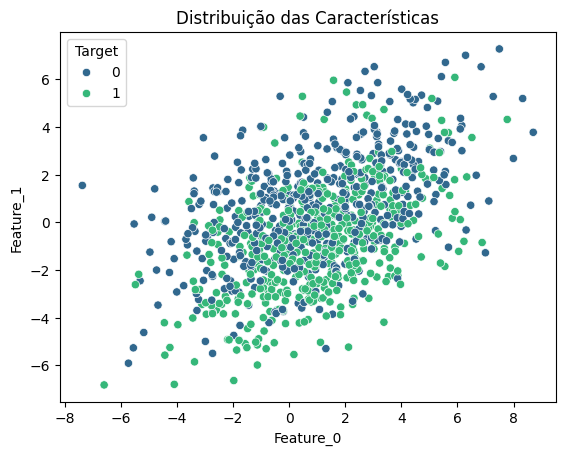

In [15]:
# Gerar um conjunto de dados sintéticos
X, y = make_classification(n_samples=1000,  # Número de amostras
                           n_features=20,   # Número de características
                           n_informative=15,  # Número de características informativas
                           n_redundant=5,    # Número de características redundantes
                           n_clusters_per_class=1,  # Número de clusters por classe
                           weights=[0.5, 0.5],  # Proporção de cada classe
                           flip_y=0.1,    # Percentual de rótulos aleatórios
                           random_state=42)  # Semente para reprodução

# Converter para um DataFrame do pandas
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

# Exibir as primeiras linhas do DataFrame
print(df.head())

# Visualizar a distribuição das classes
sns.countplot(x='Target', data=df)
plt.title('Distribuição das Classes')
plt.show()

# Visualizar um par de características
sns.scatterplot(x='Feature_0', y='Feature_1', hue='Target', data=df, palette='viridis')
plt.title('Distribuição das Características')
plt.show()

##3. Dividindo o conjunto de dados em treino e teste

Tamanho do conjunto de treino: 800 amostras
Tamanho do conjunto de teste: 200 amostras


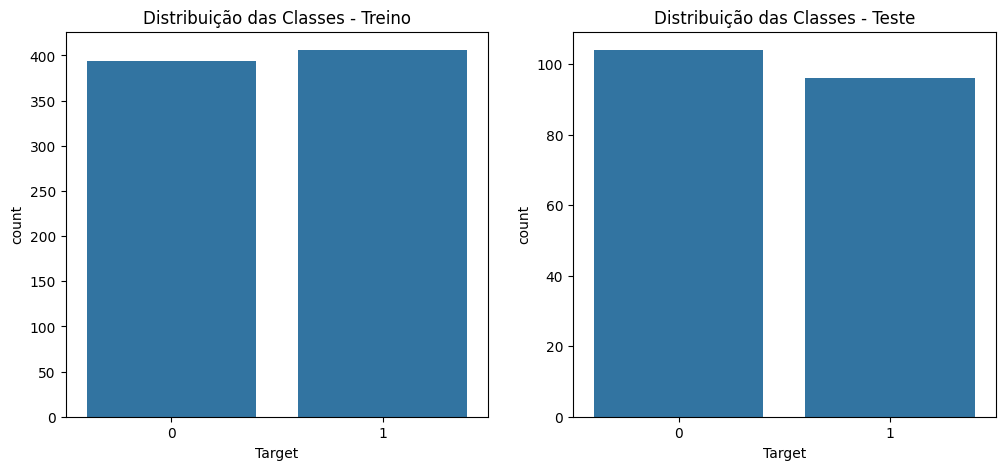

In [16]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# Visualizar a distribuição das classes no conjunto de treino e teste
df_train = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
df_train['Target'] = y_train

df_test = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])
df_test['Target'] = y_test

# Plotar a distribuição das classes no conjunto de treino
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Target', data=df_train)
plt.title('Distribuição das Classes - Treino')

# Plotar a distribuição das classes no conjunto de teste
plt.subplot(1, 2, 2)
sns.countplot(x='Target', data=df_test)
plt.title('Distribuição das Classes - Teste')

plt.show()

#4. Treinando e testando o modelo

In [17]:
# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir resultados de avaliação
print(f"Acurácia: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)


Acurácia: 0.92
Matriz de Confusão:
[[99  5]
 [11 85]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       104
           1       0.94      0.89      0.91        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



#5. Avaliando o modelo (Matriz de confusão e curva ROC)

**Relatório de Classificação:**

- Precisão: Proporção de instâncias classificadas como positivas que são realmente positivas (VP / (VP + FP)). Alta precisão indica que o modelo tem poucos falsos positivos.

- Recall: Proporção de instâncias positivas que foram corretamente identificadas (VP / (VP + FN)). Alto recall indica que o modelo captura a maioria das instâncias positivas.

- F1-Score: A média harmônica de precisão e recall, que fornece uma métrica única para avaliar o desempenho do modelo em termos de equilíbrio entre precisão e recall.

**AUC (Área Sob a Curva ROC):**

A AUC mede a capacidade do modelo de distinguir entre as classes. É a área sob a curva ROC (Receiver Operating Characteristic).

- AUC próximo de 1.0: O modelo tem um excelente desempenho e pode distinguir bem entre as classes.
- AUC próximo de 0.5: O modelo tem um desempenho semelhante ao acaso e não está fazendo um bom trabalho de separação entre as classes.

**Curva ROC:**

A curva ROC plota a taxa de verdadeiros positivos (TPR) contra a taxa de falsos positivos (FPR) para diferentes limiares de decisão. A forma da curva ROC mostra o trade-off entre TPR e FPR. Quanto mais próxima a curva estiver do canto superior esquerdo, melhor o desempenho do modelo.

A **área sob a curva (AUC)** fornece uma medida agregada da performance do modelo através de todos os possíveis limiares.

Acurácia: 0.92
Matriz de Confusão:
[[99  5]
 [11 85]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       104
           1       0.94      0.89      0.91        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

AUC (Área Sob a Curva): 0.94


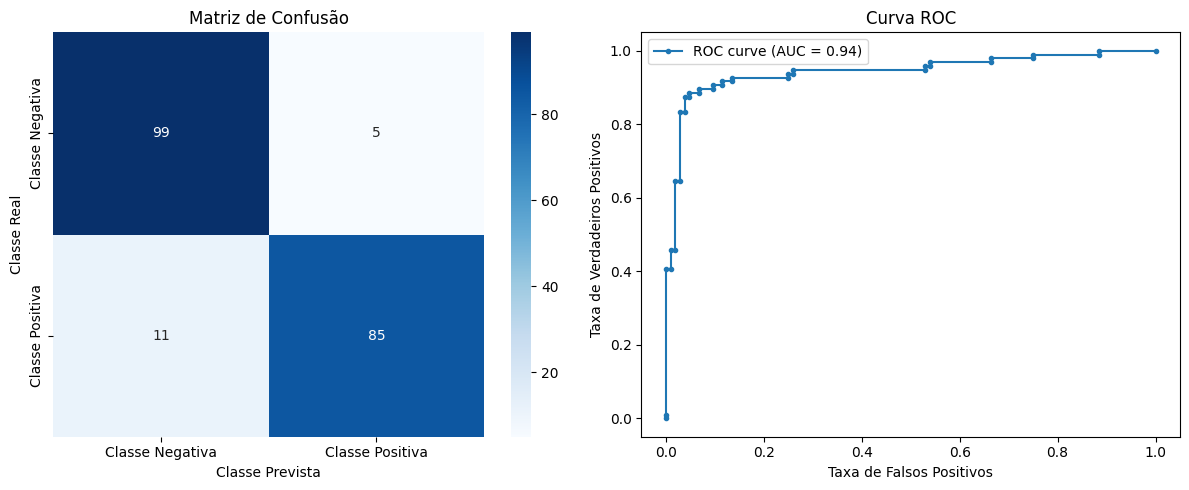

In [18]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Exibir resultados de avaliação
print(f"Acurácia: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)
print(f"AUC (Área Sob a Curva): {roc_auc:.2f}")

# Plotar a matriz de confusão
plt.figure(figsize=(12, 5))

# Subplot 1: Matriz de Confusão
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe Negativa', 'Classe Positiva'], yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()

plt.tight_layout()
plt.show()

#6. Interpretando os resultados

###**Acurácia**

Acurácia de 0.92: Isso indica que o modelo classificou corretamente 92% das amostras do conjunto de teste. É uma alta taxa de acerto geral e sugere que o modelo está funcionando muito bem na classificação dos dados.

###**Matriz de Confusão**

- Classe 0 (Negativa):

Verdadeiros Negativos (TN): 99 instâncias corretamente identificadas como Classe 0.

Falsos Positivos (FP): 5 instâncias da Classe 0 incorretamente classificadas como Classe 1.

- Classe 1 (Positiva):

Falsos Negativos (FN): 11 instâncias da Classe 1 incorretamente classificadas como Classe 0.

Verdadeiros Positivos (TP): 85 instâncias corretamente identificadas como Classe 1.

A matriz de confusão mostra que o modelo tem um bom desempenho, mas ainda comete alguns erros. Existem 5 falsos positivos (onde o modelo erroneamente previu Classe 1 para instâncias que são realmente Classe 0) e 11 falsos negativos (onde o modelo falhou em detectar instâncias de Classe 1).

###**Precisão**

Precisão para Classe Negativa (0.90): Indica que, entre todas as previsões feitas para a Classe 0, 90% eram corretas. O modelo é bastante preciso ao identificar instâncias da Classe 0.

Precisão para Classe Positiva (0.94): Indica que, entre todas as previsões feitas para a Classe 1, 94% eram corretas. O modelo é altamente preciso ao identificar instâncias da Classe 1.

###**Recall**

Recall para Classe Negativa (0.95): Mostra que o modelo conseguiu identificar corretamente 95% das instâncias reais da Classe 0. Isso indica que o modelo é eficaz em detectar instâncias da Classe 0.

Recall para Classe Positiva (0.89): Significa que o modelo identificou corretamente 89% das instâncias reais da Classe 1. Embora seja um bom recall, ainda há espaço para melhorar, pois o modelo perdeu 11 instâncias positivas (Falsos Negativos).

###**F1-Score**

F1-Score para Classe Negativa (0.93): O F1-Score combina precisão e recall, fornecendo uma medida equilibrada para a Classe 0. Um F1-Score alto sugere que o modelo está bem ajustado para identificar instâncias da Classe 0.

F1-Score para Classe Positiva (0.91): Também alto, o F1-Score para a Classe 1 indica um bom equilíbrio entre precisão e recall para detectar a Classe 1.

###**AUC (Área Sob a Curva ROC)**

AUC de 0.94: A AUC próxima de 1 indica que o modelo tem uma excelente capacidade de distinguir entre as duas classes. O valor de 0.94 sugere que o modelo é muito eficaz em separar as instâncias da Classe 1 das instâncias da Classe 0.

#7. Conclusões

O modelo de regressão logística está performando de maneira excelente, com uma alta acurácia de 92% e uma AUC de 0.94. A precisão e o recall são fortes para ambas as classes, com a Classe 1 tendo um ligeiramente maior valor de precisão, mas um recall um pouco menor em comparação com a Classe 0. O F1-Score também reflete um bom equilíbrio entre precisão e recall para ambas as classes.

Os erros identificados são relativamente pequenos em comparação com o desempenho geral do modelo. O maior desafio identificado é melhorar o recall para a Classe 1, o que pode exigir ajustes adicionais no modelo, como a exploração de técnicas de balanceamento de classes ou a otimização de hiperparâmetros. No geral, o modelo está bem ajustado e oferece uma boa performance para o problema de classificação em questão.

Este script oferece uma visão completa sobre como treinar um modelo de regressão logística e avaliar seu desempenho usando várias métricas.